In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from adalinegd import AdalineGD

## Data Loading

We use Iris dataset here. There are 3 classes and 4 features. All features are numerical but not scaled. No missing values.

Since the labels are strings, we'll map the string into integers by the Pandas's approach, i.e. by using the method map(). Finally, we consider only the observations with class 'Iris-setosa' or 'Iris-versicolor'.

In [2]:
iris = pd.read_csv('data/iris.data', header=None)
iris_small = iris[iris[4].isin(['Iris-setosa', 'Iris-versicolor'])]
iris_small.loc[:, (4,)] = iris_small[4].map({'Iris-setosa': 0, 'Iris-versicolor': 1})
X, y = iris_small[[0, 2]], iris_small[4]

In [3]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.

   Parameters
   ------------
   eta : float
     Learning rate (between 0.0 and 1.0)
   n_iter : int
     number of epochs.
   random_state : int
     Random number generator seed for random weight initialization.

   Attributes
   -----------
   w_ : 1d-array
     Weights after fitting.
   b_ : Scalar
     Bias unit after fitting.
   losses_ : list
     Mean squared eror loss function values in each epoch.

   """

    def __init__(self, eta=0.01, epochs=50, random_state=1):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state

    def net_input(self, X):
        """Calculate net input"""
        return X.dot(self.w_) + self.b_  # Xw + b

    def activation(self, X):
        """Compute linear activation"""
        return X

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        # weights and bias initialization
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        # Approach 1 - matrix formulation
        for i in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)  # phi(Xw+b) = Xw + b
            errors = y - output  # definition of e
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]  # updating rules for all weights
            self.b_ += self.eta * errors.mean()  # updating the rule
            loss = (errors ** 2).mean()
            self.losses_.append(loss)
        return self

        # Approach 2 - extended learning algorithm with eta
        """
        for i in range(self.epochs): # for each epoch
            net_input = self.net_input(X)
            output = # phi(Xw + b) = Xw + b
            errors = # definition of e
            for j in range(self.w_.shape[0]): # for j in [1, ..., m]
                self.w_[j] + = # updating rule for a single weight
            self.b_ += # updatig rule for bias
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
        """

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


Creation of the training set X and the label vector y.

In [4]:
ada_cls = AdalineGD(eta=0.01, epochs=30).fit(X, y)

## The role of the learning rate

Fixed number of epochs -- passes over the entire dataset; we plot the loss as a function of the epoch to verify if the algorithm converge/diverge and the rate of convergence.

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
/var/folders/by/pqh4gvw52t5fm7pvbqnvcyy00000gn/T/ipykernel_41211/922554207.py:5: SyntaxWarning: invalid escape sequence '\e'
  ax.plot(range(1,51), ada_cls.losses_, label = f'$\eta$={eta}', marker='o')


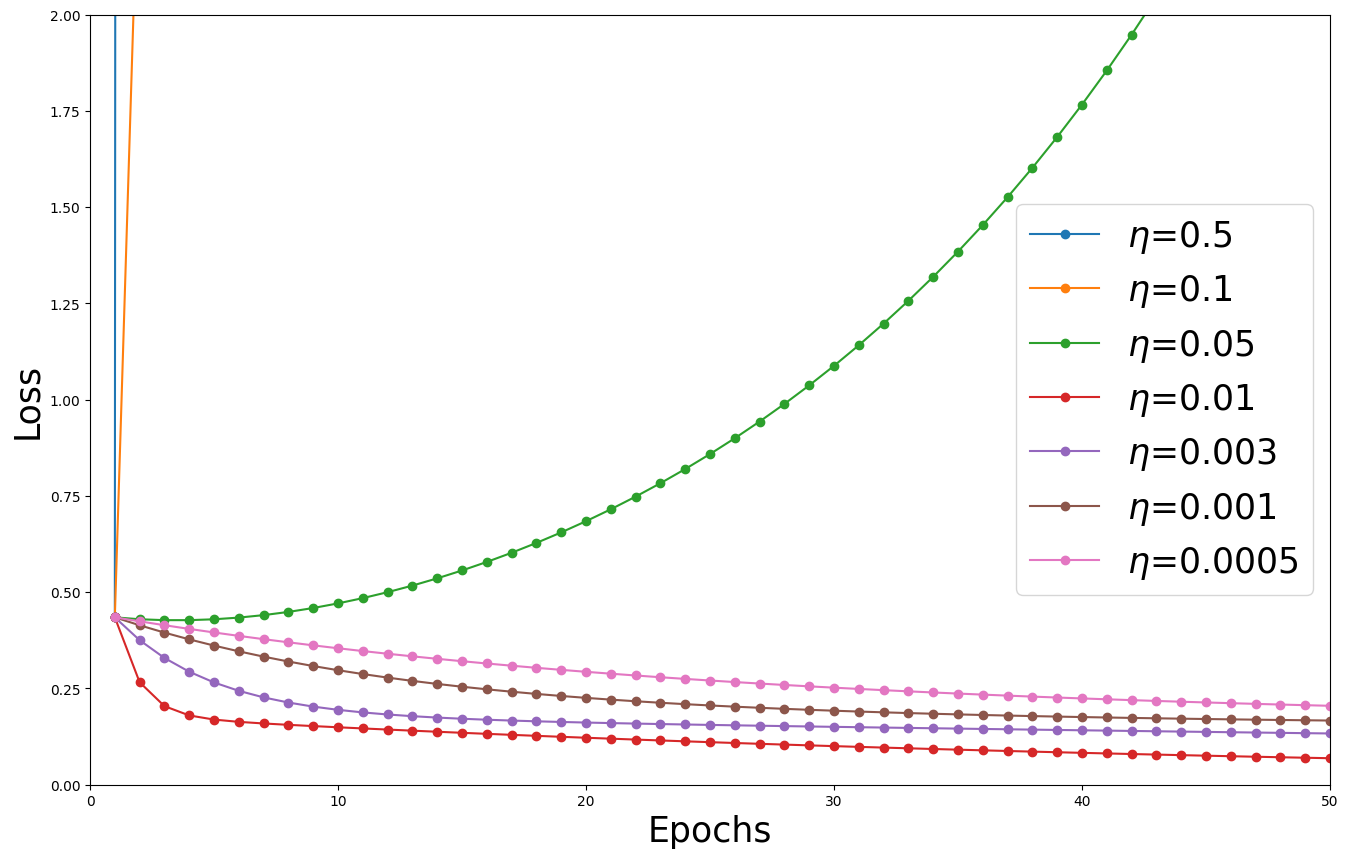

In [5]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot()
for eta in [0.5, 0.1, 0.05, 0.01, 0.003, 0.001, 0.0005]:
    ada_cls = AdalineGD(epochs=50, eta=eta).fit(X, y)
    ax.plot(range(1,51), ada_cls.losses_, label = f'$\eta$={eta}', marker='o')
ax.set_ylim((0,2))
ax.set_xlim((0,50))
ax.set_xlabel('Epochs',size=25)
ax.set_ylabel('Loss',size=25)
ax.legend(fontsize = 25)

In [6]:
from sklearn.preprocessing import StandardScaler

## The effect of feature scaling

Most of the learning algorithms require features to be scaled to convergence and obtain higher performances.
Here we have an example of the effect of feature scaling for different values of eta.

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
/var/folders/by/pqh4gvw52t5fm7pvbqnvcyy00000gn/T/ipykernel_41211/3906244928.py:5: SyntaxWarning: invalid escape sequence '\e'
  ax.plot(range(1,26),ada_cls.losses_, label = f'$\eta$=0.01 - No feature scaling', marker='o', lw = 5, ms = 8)
/var/folders/by/pqh4gvw52t5fm7pvbqnvcyy00000gn/T/ipykernel_41211/3906244928.py:8: SyntaxWarning: invalid escape sequence '\e'
  ax.plot(range(1,26),ada_cls.losses_, label = f'$\eta$=0.05 - No feature scaling', marker='o', lw = 5, ms = 8)
/var/folders/by/pqh4gvw52t5fm7pvbqnvcyy00000gn/T/ipykernel_41211/3906244928.py:14: SyntaxWarning: invalid escape sequenc

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('O') to dtype('float64') with casting rule 'same_kind'

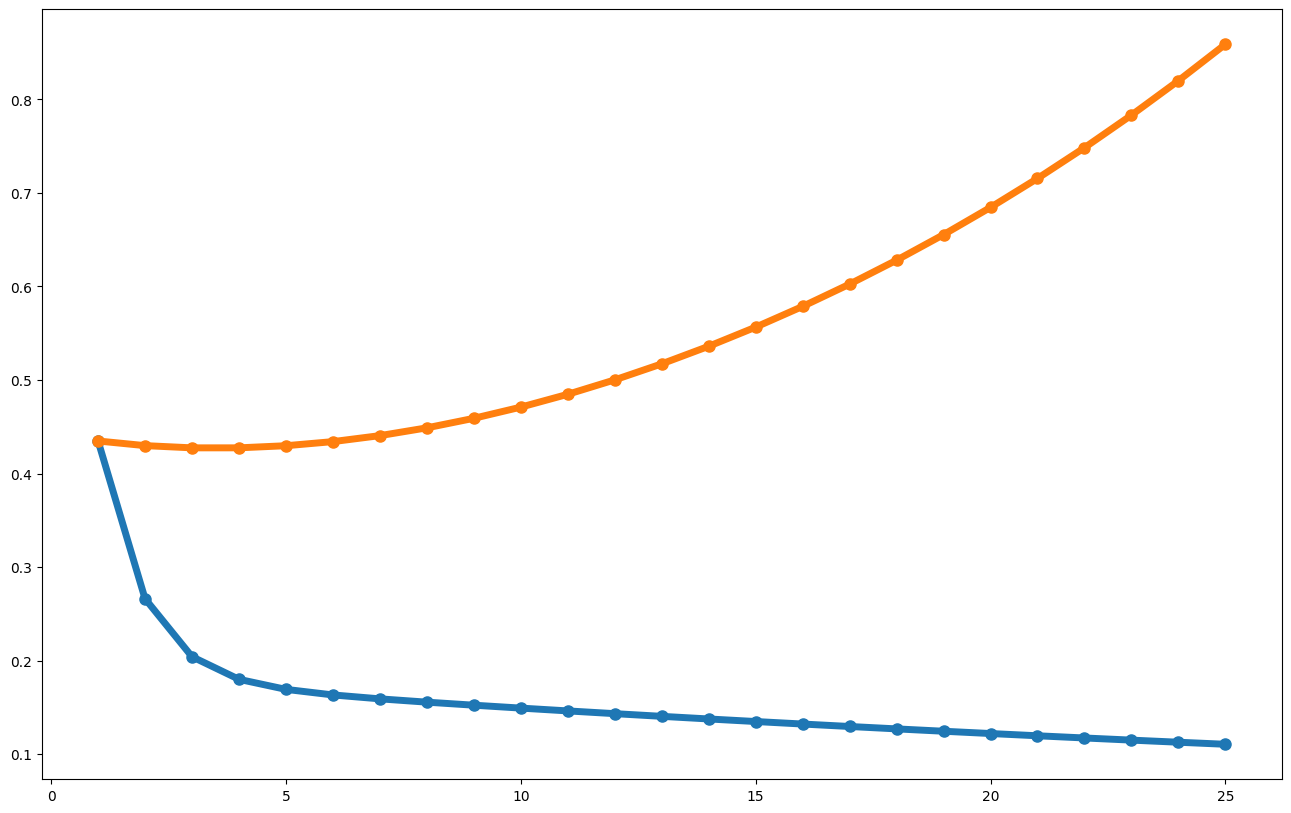

In [7]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot()

ada_cls = AdalineGD(epochs=25, eta = 0.01).fit(X,y)
ax.plot(range(1,26),ada_cls.losses_, label = f'$\eta$=0.01 - No feature scaling', marker='o', lw = 5, ms = 8)

ada_cls = AdalineGD(epochs=25, eta = 0.05).fit(X,y)
ax.plot(range(1,26),ada_cls.losses_, label = f'$\eta$=0.05 - No feature scaling', marker='o', lw = 5, ms = 8)

standard = StandardScaler()
X_s = standard.fit_transform(X)

ada_cls_scaled = AdalineGD(epochs=25, eta = 0.05).fit(X_s,y)
ax.plot(range(1,26),ada_cls_scaled.losses_, label = f'$\eta$=0.05 - Feature scaling: On', marker='o', lw = 5, ms = 8)

ada_cls_scaled = AdalineGD(epochs=25, eta = 0.01).fit(X_s,y)
X_s = standard.fit_transform(X)
ax.plot(range(1,26),ada_cls_scaled.losses_, label = f'$\eta$=0.01 - Feature scaling: On', marker='o', lw = 5, ms = 8)

ax.set_ylim((0,1))
ax.set_xlim((0,25))
ax.legend()